In [2]:
import pandas as pd

# Load  dataset
data = pd.read_csv('/content/heart (4).csv')

# Print column names to identify the correct ones
print(data.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss

# Load dataset
data = pd.read_csv('/content/heart (4).csv')

# Assuming that 'target' is outcome variable
X = data.drop('target', axis=1)  # Features
y = data['target']  # Actual outcomes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for the test set
predicted_probabilities = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate the Brier score for the test set
brier_score = brier_score_loss(y_test, predicted_probabilities)

print("Brier Score:", brier_score)


Brier Score: 0.1350840097728993


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
import pandas as pd

# Load  dataset
data = pd.read_csv('/content/heart (4).csv')

# Split data
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Calibrate the model
calibrated = CalibratedClassifierCV(base_estimator=model, method='sigmoid', cv=5)  # Here we use 5-fold CV
calibrated.fit(X_train, y_train)  # We fit the CalibratedClassifierCV

# Predict calibrated probabilities on the test set
calibrated_probabilities = calibrated.predict_proba(X_test)[:, 1]

# Calculate the Brier score with calibrated probabilities
new_brier_score = brier_score_loss(y_test, calibrated_probabilities)
print("New Brier Score:", new_brier_score)


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


New Brier Score: 0.13175487665003122


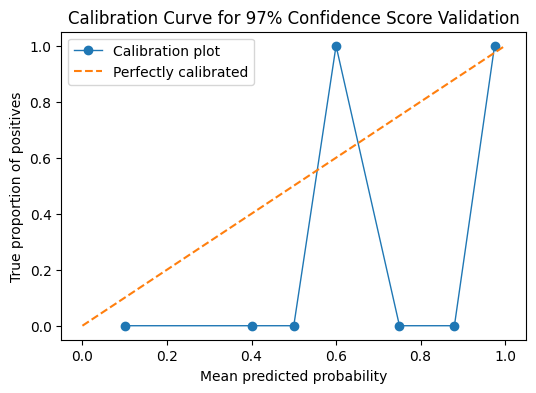

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


data = pd.DataFrame({
    'predicted_probability': [0.97, 0.97, 0.88, 0.75, 0.60, 0.97, 0.40, 0.50, 0.99, 0.10],
    'actual_outcome': [1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
})

# Calculate the calibration curve
prob_true, prob_pred = calibration_curve(data['actual_outcome'], data['predicted_probability'], n_bins=10)

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('True proportion of positives')
plt.title('Calibration Curve for 97% Confidence Score Validation')
plt.legend()
plt.show()


Logistic Regression C=0.001: AUC=0.9192
Logistic Regression C=0.01: AUC=0.9181
Logistic Regression C=0.1: AUC=0.9267
Logistic Regression C=1.0: AUC=0.9267
Logistic Regression C=10.0: AUC=0.9278
Logistic Regression C=100.0: AUC=0.9278
Logistic Regression C=1000.0: AUC=0.9278
Decision Tree max_depth=1: AUC=0.8389
Decision Tree max_depth=2: AUC=0.8879
Decision Tree max_depth=3: AUC=0.8588
Decision Tree max_depth=4: AUC=0.8432
Decision Tree max_depth=5: AUC=0.8491
Decision Tree max_depth=6: AUC=0.8637
Decision Tree max_depth=7: AUC=0.8486
Decision Tree max_depth=8: AUC=0.8389
Decision Tree max_depth=9: AUC=0.8389
Decision Tree max_depth=10: AUC=0.8217
Random Forest n_estimators=10: AUC=0.8944
Random Forest n_estimators=50: AUC=0.9224
Random Forest n_estimators=100: AUC=0.9289
Random Forest n_estimators=200: AUC=0.9235
XGBoost learning_rate=0.01: AUC=0.9256
XGBoost learning_rate=0.042222222222222223: AUC=0.9213
XGBoost learning_rate=0.07444444444444444: AUC=0.9084
XGBoost learning_rate=0.10

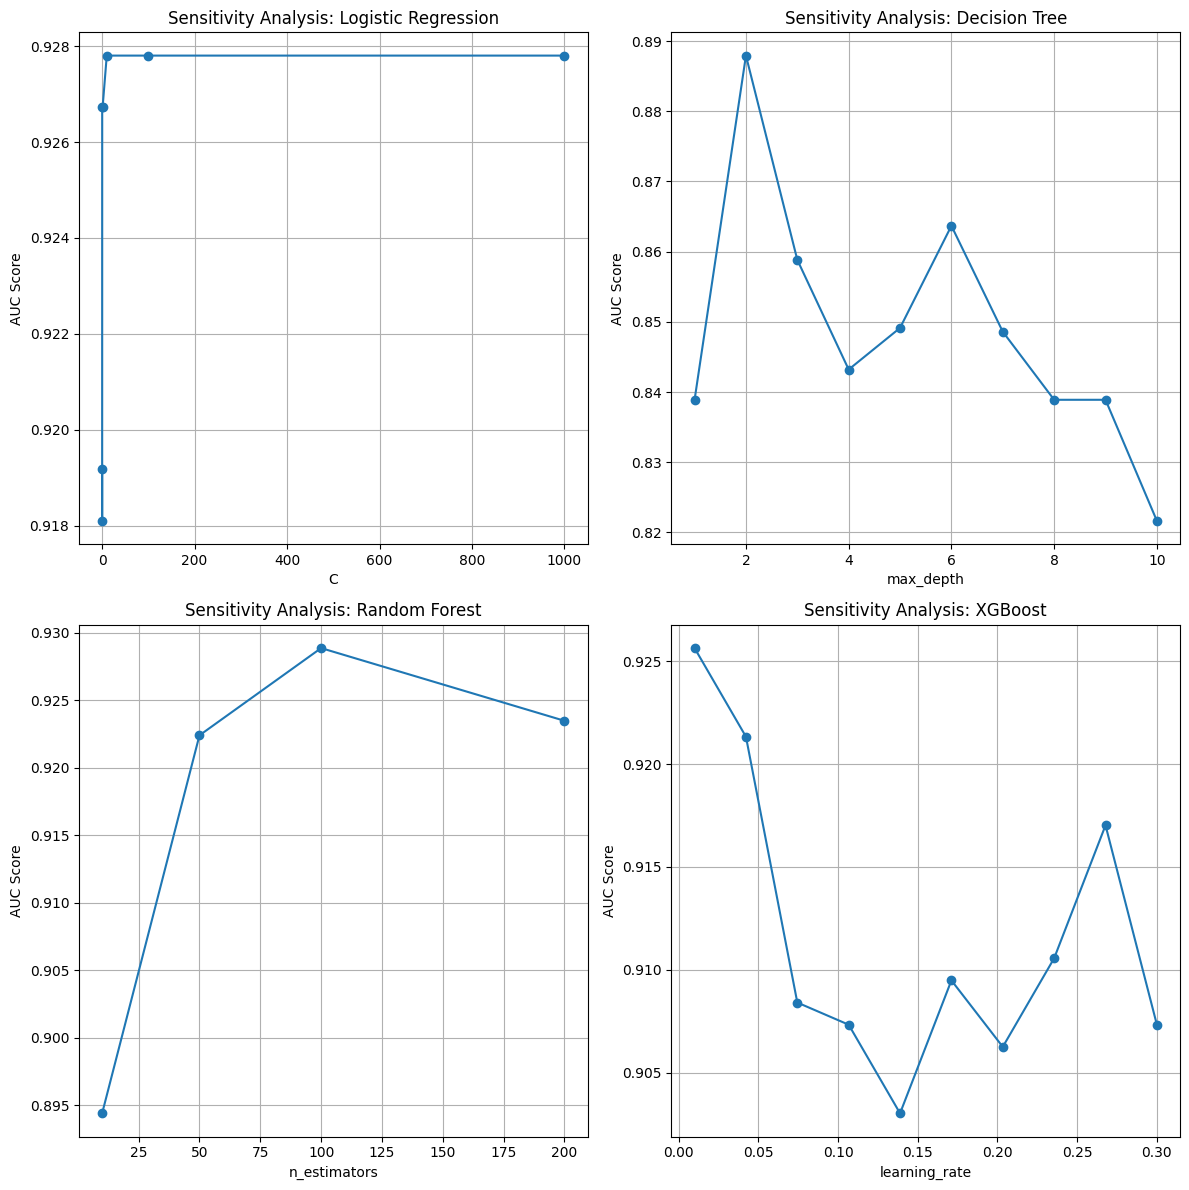

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Load data
data = pd.read_csv('/content/heart (4).csv')
X = data.drop('target', axis=1)
y = data['target']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models and parameter grids
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), 'C', np.logspace(-3, 3, 7)),
    'Decision Tree': (DecisionTreeClassifier(), 'max_depth', np.arange(1, 11)),
    'Random Forest': (RandomForestClassifier(), 'n_estimators', [10, 50, 100, 200]),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 'learning_rate', np.linspace(0.01, 0.3, 10)),
}

# Prepare the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

for idx, (name, (model, param_name, param_values)) in enumerate(models.items()):
    scores = []
    for value in param_values:
        model.set_params(**{param_name: value})
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_pred_proba)
        scores.append(auc_score)
        print(f'{name} {param_name}={value}: AUC={auc_score:.4f}')  # Debug output

    axes[idx].plot(param_values, scores, marker='o', linestyle='-')
    axes[idx].set_title(f'Sensitivity Analysis: {name}')
    axes[idx].set_xlabel(f'{param_name}')
    axes[idx].set_ylabel('AUC Score')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

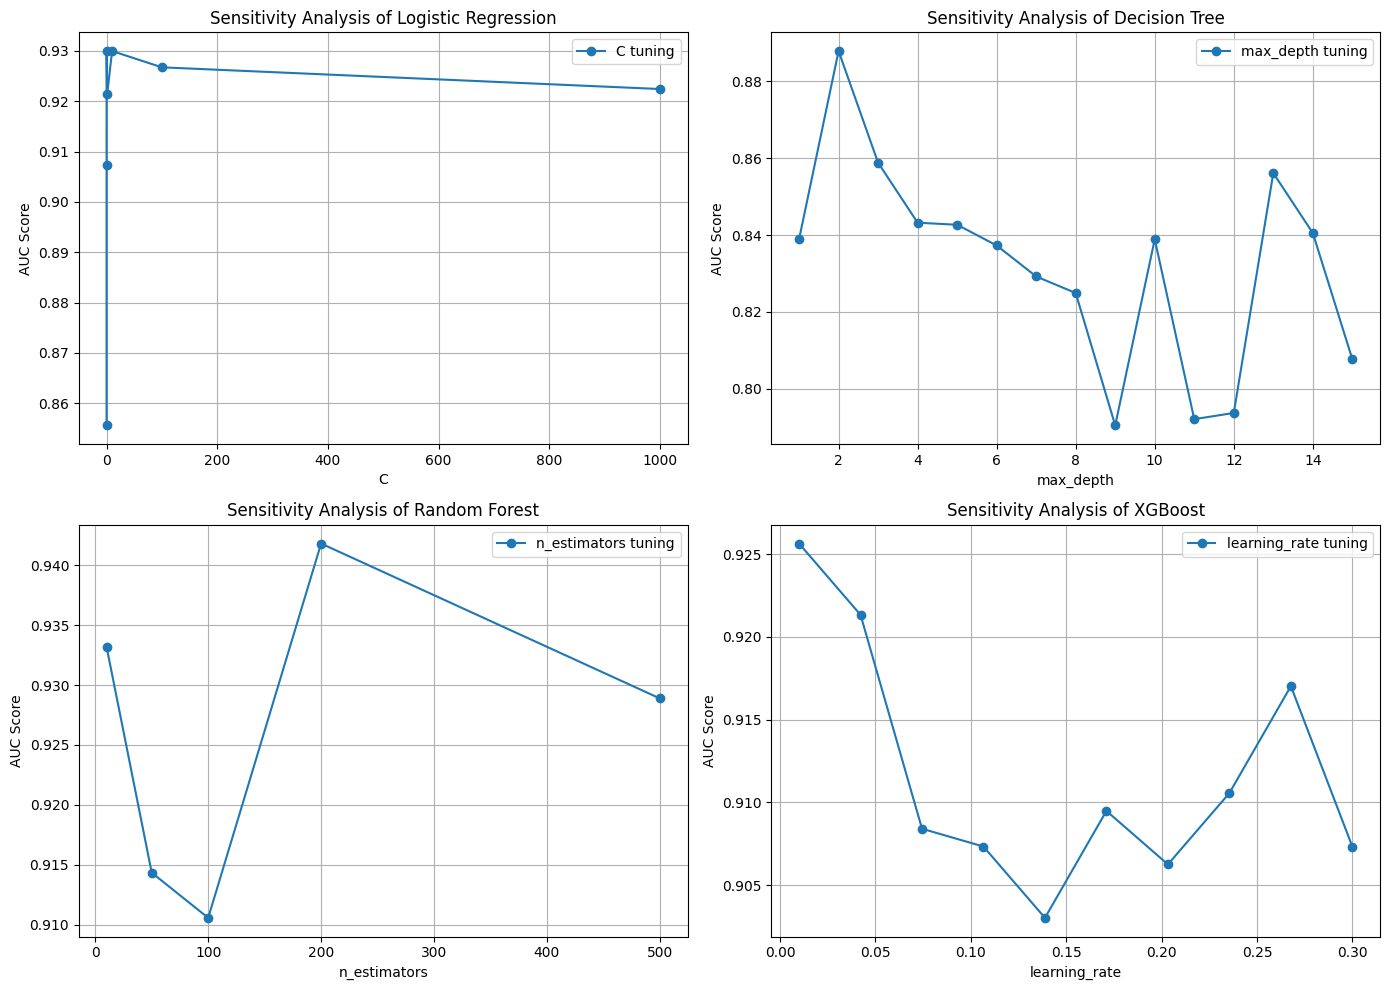

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

# Load data
data = pd.read_csv('/content/heart (4).csv')
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and parameters to vary
models = {
    'Logistic Regression': (LogisticRegression(), 'C', np.logspace(-3, 3, 7)),
    'Decision Tree': (DecisionTreeClassifier(), 'max_depth', np.arange(1, 16)),
    'Random Forest': (RandomForestClassifier(), 'n_estimators', [10, 50, 100, 200, 500]),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 'learning_rate', np.linspace(0.01, 0.3, 10))
}

# Prepare the figure
plt.figure(figsize=(14, 10))
plot_num = 1

# Perform sensitivity analysis and plot
for model_name, (model, param_name, values) in models.items():
    scores = []
    for value in values:
        model.set_params(**{param_name: value})
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
        scores.append(auc)

    # Create subplot for each model
    plt.subplot(2, 2, plot_num)
    plt.plot(values, scores, marker='o', linestyle='-', label=f'{param_name} tuning')
    plt.title(f'Sensitivity Analysis of {model_name}')
    plt.xlabel(param_name)
    plt.ylabel('AUC Score')
    plt.grid(True)
    plt.legend()
    plot_num += 1

plt.tight_layout()
plt.show()
